## Labo: k-means

Christophe Debruyne

Disable autoscrolling so that we can see the output in full.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Imports
* Numpy provides us classes and functions to easily work with mathematical arrays.
* Matplotlib for plotting the scatterplots.
* scipy.spatial has a library for plotting vonoroi diagrams. Be careful, the library requires at least three points in a two-dimensional space.
* 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import random

We will first a very simple array with 9 points to develop k-means

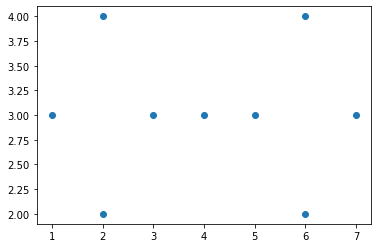

In [3]:
X = np.array([ [1,3], [2,2], [2,4], [3,3], [4,3], [5,3], [6,2], [6,4], [7,3] ])
plt.scatter(X[:,0], X[:,1])
plt.show()

Here are the three methods for the k-means algorithm:
* k_means is the main algorithm and calls assign and update which you have to implement
* assign to assign centroids to points
* update to recompute the centroids based on the assignment

There are also to methods for printing the results:
* plot_results, which you can call after running k_means
* plot_vonoroi, to plot the vonoroi diagram (when you have k >= 3)

In [4]:
def k_means(X, k=2, max_iterations=100):
    """
        Input: 
        - X, a numpy.array of points
        - k, a number >= 2 of clusters to be found
        - max_iterations to ensure the algorithm stops if the 
          results were not to converge soon enough
          
        You may assume that input is valid. There is thus no need for validation.
        Try to ensure your code can work with points of n >= 2 length. Again, you
        may assume that all points in X have the same length.
        
        Output:
        - assignment, a numpy.array containing the index of the centroid (in centroids).
                      the ith element in assignment will refer to the centroid of the
                      ith point in X
        - centroids, a numpy.array of points containing the centroids
    """
    centroids = X[random.sample(range(0, len(X)), k)]

    # You can uncomment the following three lines to plot the scatterplot and the
    # randomly chosen centroids:
    #plt.scatter(X[:,0], X[:,1])
    #plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', s=200)    
    #plt.show()   
    
    assignment = None
    
    for i in range(max_iterations):
        old_assignment = assignment

        assignment = assign(X, centroids)
        
        # You can uncomment the following three lines to plot the clusters
        # in each iteration:
        #plt.scatter(X[:,0], X[:,1], c=assignment)
        #plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', s=200)    
        #plt.show()
        
        centroids = update(X, assignment)            

        if np.array_equal(old_assignment, assignment):
            print(f'We found a solution after {i} iterations:')
            break
            
    return assignment, centroids

In [5]:
def assign(X, centroids):
    """
        Input: 
        - X, a numpy.array of points
        - centroids, a numpy.array of centroids (also points)
        
        Output:
        - a numpy.array of length len(X) which contains at index i the index of 
          the centroid that the ith x in X is closest to (euclidian distance)
    """
    assignment = []
    for x in X:
        distances = np.array([ np.linalg.norm(x - c) for c in centroids])
        closest = np.argmin(distances)
        assignment.append(closest)
    return np.array(assignment)

In [6]:
def update(X, assignment):
    """
        Input:
        - X, a numpy.array of points
        - assignment, a numpy.array containing the index of centroids for
          each corresponding x in X
        
        Output:
        - a numpy.array that contain the new centroids (based on computing the means)
    """
    centroids = []
    for k in np.unique(assignment):
        # Indexes of points classified as k
        indices = np.where(assignment == k)
        
        # Counting the number of k's, and computing the new mean
        count = len(X[indices])
        mean = sum(X[indices]) / count
        
        # append new mean to the array of centroids
        centroids.append(mean)
    return np.array(centroids)

In [7]:
def plot_results(X, assignment, centroids):
    """Plot the points and the centroids. Colors are based on the assignment."""
    
    print("The result is:")
    
    for k in np.unique(assignment):
        # Indexes of points classified as k
        indices = np.where(assignment == k)
        count = len(X[indices])
        print(f'Cluster {k + 1} with centroid {centroids[k]} groups {count} points.')
        
    plt.scatter(X[:,0], X[:,1], c=assignment)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', s=200)    
    
    plt.show()

In [8]:
def plot_vonoroi(X, assignment, centroids):
    """Plot the points and the centroids. Colors are based on the assignment. The centroids are used
       for the vonoroi diagram. Note that this library requires at least three points."""
    
    if len(centroids) > 2:
        vor = Voronoi(centroids)
        fig = voronoi_plot_2d(vor, show_points=False)    
        plt.scatter(X[:,0], X[:,1], c=assignment)
        plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', s=200)  
        plt.show()
    else:
        print(f'Cannot plot vonori diagram for {len(centroids)} points.')

Now execute k_means with our toy example and plot the results. Note that a vonoroi diagram cannot be shown here. The vonoroi diagram might also fail when there are not enough points.

In [9]:
assignment, centroids = k_means(X, 2, 100)
plot_results(X, assignment, centroids)
plot_vonoroi(X, assignment, centroids)

NameError: name 'random' is not defined

In [ ]:
X = np.random.rand(100,2)
plt.scatter(X[:,0], X[:,1])
plt.show()

Now let's generate 100 random points and cluster them into three groups.

In [ ]:
assignment, centroids = k_means(X, 3, 100)
plot_results(X, assignment, centroids)
plot_vonoroi(X, assignment, centroids)

In this example, we generate three random clusters. The k_means algorithm should be able to reconstitute those clusters. Outliers in each cluster may be assigned to the wrong cluster, though. I encourage you to play with the scales and location of each cluster to better grasp the algorithm and its limitations.

In [ ]:
a = np.random.normal(loc=[5, 5], scale=[0.5, 0.5], size=(100, 2))
b = np.random.normal(loc=[7, 9], scale=[1, 1], size=(100, 2))
c = np.random.normal(loc=[5, 9], scale=[1, 1], size=(100, 2))
X = np.append(a, b, axis=0)
X = np.append(X, c, axis=0)

assignment, centroids = k_means(X, 3, 100)
plot_results(X, assignment, centroids)
plot_vonoroi(X, assignment, centroids)